In [45]:
from OLS import OLS
from Ridge import Ridge
from LASSO import LASSO
from sklearn.preprocessing import StandardScaler
from functions import Polynomial_Features
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from plotting import set_plot_params

In [96]:
"""
Runs linear regression using every combination of model and gradient descent method on a noisy data set generated by a polynomial with uniformly distributed coeffs in [-25,25].
The resulting polynomial fits are plotted alongside the true function and the noisy data points 

"""
np.random.seed(2025)

FOLDER = "../figs/"
SAVE_NAME = "gd_verif.pdf"

noise_var = 0.1
n = 100
deg = 3
# coeffs picked from [-coeffs_range, coeffs_range]
coeffs_range = 25 

# plotting
location = (1,0.5)
num_col = 1

colors = mpl.color_sequences["tab20b"] 

gds = ["simple",
        "momentum",
        "adagrad",
        "RMSProp",
        "adam",
        "simple_stochastic",
        "momentum_stochastic",
        "adagrad_stochastic",
        "RMSProp_stochastic",
        "adam_stochastic"]

gds_labels =   ["Simple",
                "Momentum",
                "AdaGrad",
                "RMSProp",
                "Adam",
                "S Simple",
                "S Momentum",
                "S AdaGrad",
                "S RMSProp",
                "S Adam"]

x = np.linspace(-1,1.5,n)
# get random coefficients
coeffs = np.random.uniform(-25, 25, deg+1)
y_true = np.zeros(n)
for i, c in enumerate(coeffs):
    y_true += c*x**(i)
y_max = np.max(np.abs(y_true))
#y_true = y_true / y_max
#coeffs = coeffs / y_max
y = y_true + np.random.normal(0, noise_var*y_max, n)
print(coeffs)
X = Polynomial_Features(x, deg)

scaler = StandardScaler()
scaler.fit(X)
X_tr = scaler.transform(X)
y_mean = y.mean()

[-18.22559182  19.39258514  21.63028199  -2.7215918 ]


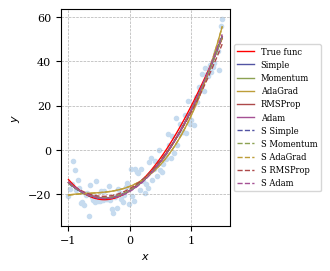

In [97]:
set_plot_params(1,1)

plt.scatter(x,y, marker=".", color = mpl.color_sequences["tab20c"][3])
plt.plot(x,y_true, label = "True func", color = "red")

# plot OLS
for i, gd in enumerate(gds):
    ols = OLS(gd)
    ols.fit(X_tr, y, learning_rate=0.1, max_iter = 10000, precision=1e-6)
    if i < 5:
        style = "-"
    else:
        style = "--"
    plt.plot(x, X_tr @ ols.model_params + y_mean, linestyle=style, label = gds_labels[i], color = colors[4*(i%5)+1])

# Put a legend below current axis
plt.legend(loc='center left', bbox_to_anchor=location,
         fancybox=True, shadow=False, ncol=num_col)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.savefig(FOLDER+"OLS"+SAVE_NAME)
plt.show()

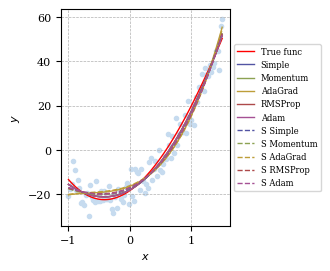

In [98]:
set_plot_params(1,1)

plt.scatter(x,y, marker=".", color = mpl.color_sequences["tab20c"][3])
plt.plot(x,y_true, label = "True func", color = "red")

# plot Ridge
for i, gd in enumerate(gds):
    ridge = Ridge(gd)
    ridge.fit(X_tr, y, learning_rate=0.1, max_iter = 10000, precision=1e-6)
    if i < 5:
        style = "-"
    else:
        style = "--"
    plt.plot(x, X_tr @ ridge.model_params + y_mean, linestyle=style, label = gds_labels[i], color = colors[4*(i%5)+1])

# Put a legend below current axis
plt.legend(loc='center left', bbox_to_anchor=location,
         fancybox=True, shadow=False, ncol=num_col)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.savefig(FOLDER+"ridge"+SAVE_NAME)
plt.show()

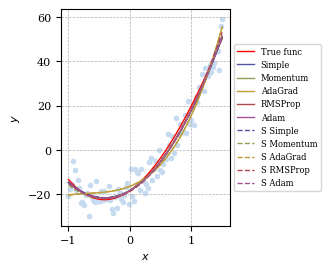

In [99]:
set_plot_params(1,1)

plt.scatter(x,y, marker=".", color = mpl.color_sequences["tab20c"][3])
plt.plot(x,y_true, label = "True func", color = "red")

# plot LASSO
for i, gd in enumerate(gds):
    lasso = LASSO(gd)
    lasso.fit(X_tr, y, learning_rate=0.1, max_iter = 10000, precision=1e-6)
    if i < 5:
        style = "-"
    else:
        style = "--"
    plt.plot(x, X_tr @ lasso.model_params + y_mean, linestyle=style, label = gds_labels[i], color = colors[4*(i%5)+1])

# Put a legend below current axis
plt.legend(loc='center left', bbox_to_anchor=location,
         fancybox=True, shadow=False, ncol=num_col)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.savefig(FOLDER+"lasso"+SAVE_NAME)
plt.show()